In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt

# 9类

In [3]:
df_with_label=pd.read_csv('data/df_with_label.csv')

In [4]:
df_with_label['label_time']=pd.to_datetime((df_with_label['label_time']).apply(str))

In [5]:
df_with_label.head()

,Unnamed: 0,trade_dt_x,wind_code,ep_ttm,bp_lyr,sp_ttm,cfp_ncf_ttm,cfp_ocf_ttm,cfp_fcff_ttm,ortoev_ttm,...,beta_60D_szzz,beta_120D_szzz,beta_240D_szzz,beta_480D_szzz,updatetime,trade_dt_y,s_mq_pctchange,s_mq_amount,label,label_time
0,0,2015-01-30,000001.SZ,0.120824,0.796337,0.436667,0.090356,-0.089589,NaN,0.397811,...,1.357957,1.313219,1.339941,1.574382,2019-05-23 01:48:00.000,2015-02-27,0.4304,1.804355e+06,2,2015-01-30
1,1,2015-01-30,000002.SZ,0.106428,0.542133,0.932968,0.081991,0.215316,0.043625,0.878831,...,1.330106,1.297934,1.226921,1.308739,2019-05-23 01:48:00.000,2015-02-27,-2.8202,3.287976e+06,0,2015-01-30
2,2,2015-01-30,000004.SZ,-0.005140,0.048630,0.046602,-0.010674,0.001702,-0.007284,0.047010,...,0.367000,0.331869,0.453777,0.558445,2019-05-23 01:48:00.000,2015-02-27,7.8996,4.136355e+04,6,2015-01-30
3,3,2015-01-30,000005.SZ,-0.012082,0.158174,0.014907,0.000598,-0.030551,0.086292,0.015112,...,0.311863,0.295469,0.554438,0.811105,2019-05-23 01:48:00.000,2015-02-27,0.0000,0.000000e+00,1,2015-01-30
4,4,2015-01-30,000006.SZ,0.065695,0.446514,0.415537,-0.023423,-0.107033,0.079987,0.376103,...,0.743068,0.790482,0.879827,1.056388,2019-05-23 01:48:00.000,2015-02-27,1.0795,1.422369e+05,2,2015-01-30


In [7]:
portfolio_9=pd.read_csv('xgboost/data/portfolio_9.csv')

In [8]:
portfolio_9=portfolio_9[['trade_dt_x','wind_code']]

In [9]:
portfolio_9['trade_dt_x']=pd.to_datetime((portfolio_9['trade_dt_x']).apply(str))

In [10]:
df_9= pd.merge(portfolio_9, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])

In [11]:
df_9['s_mq_pctchange']/=100

In [12]:
df_9['s_mq_pctchange']+=1

In [13]:
df_9

,trade_dt_x_x,wind_code,Unnamed: 0,trade_dt_x_y,ep_ttm,bp_lyr,sp_ttm,cfp_ncf_ttm,cfp_ocf_ttm,cfp_fcff_ttm,...,beta_60D_szzz,beta_120D_szzz,beta_240D_szzz,beta_480D_szzz,updatetime,trade_dt_y,s_mq_pctchange,s_mq_amount,label,label_time
0,2019-01-31,000007.SZ,149117,2019-01-31,-0.001524,0.227465,0.022758,-0.010360,0.001587,0.014384,...,1.285331,1.036193,0.749712,0.903783,2019-05-23 04:08:00.000,2019-02-28,1.431338,187275.8550,9,2019-01-31
1,2019-01-31,000048.SZ,149149,2019-01-31,0.004876,0.148630,0.278655,0.217179,0.182323,0.194351,...,0.359656,0.546081,0.376880,0.410542,2019-05-23 04:08:00.000,2019-02-28,1.024349,15324.9284,0,2019-01-31
2,2019-01-31,000056.SZ,149153,2019-01-31,0.032631,1.048904,0.160690,-0.143281,0.143013,-0.139756,...,0.883845,0.305347,0.215345,0.316245,2019-05-23 04:08:00.000,2019-02-28,1.251337,124263.2619,6,2019-01-31
3,2019-01-31,000422.SZ,149202,2019-01-31,-1.186183,0.393225,4.353740,-0.045740,-0.336150,-1.738534,...,0.927202,0.769031,0.741863,0.770859,2019-05-23 04:08:00.000,2019-02-28,1.108682,61192.7287,1,2019-01-31
4,2019-01-31,000518.SZ,149224,2019-01-31,-0.013554,0.234948,0.129413,-0.001596,0.133447,0.017275,...,0.988569,0.983461,1.059860,1.054609,2019-05-23 04:08:00.000,2019-02-28,1.867537,318001.0721,9,2019-01-31
5,2019-01-31,000526.SZ,149231,2019-01-31,0.016695,0.078979,1.651228,0.119995,0.145336,0.179820,...,0.859563,0.931534,1.054872,0.730112,2019-05-23 04:08:00.000,2019-02-28,1.237296,98927.4671,6,2019-01-31
6,2019-01-31,000590.SZ,149280,2019-01-31,-0.004266,0.367555,0.162784,0.073361,-0.010568,0.043718,...,1.109678,1.340444,1.281368,1.196634,2019-05-23 04:08:00.000,2019-02-28,1.174096,15422.3243,3,2019-01-31
7,2019-01-31,000600.SZ,149289,2019-01-31,0.020230,1.022945,1.277292,0.015978,0.162208,-0.034829,...,1.380433,1.091801,1.205883,1.336796,2019-05-23 04:08:00.000,2019-02-28,1.122056,118414.7458,1,2019-01-31
8,2019-01-31,000611.SZ,149298,2019-01-31,-0.047518,0.371781,0.017182,-0.002383,0.094771,0.951860,...,1.243498,1.051203,0.963086,1.011695,2019-05-23 04:08:00.000,2019-02-28,1.293775,94415.9879,8,2019-01-31
9,2019-01-31,000633.SZ,149316,2019-01-31,-0.007845,0.082758,0.047231,-0.250585,-0.248462,0.025128,...,1.925120,1.575274,1.436152,1.479244,2019-05-23 04:08:00.000,2019-02-28,1.211429,125613.7007,5,2019-01-31


In [14]:
yield_array_9=df_9.groupby('label_time').mean()['s_mq_pctchange']

In [15]:
np.std(yield_array_9)

0.08452974832757336

C:\Users\surface\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


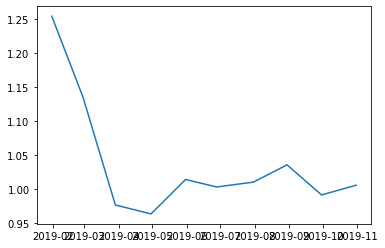

In [16]:
plt.plot(yield_array_9)

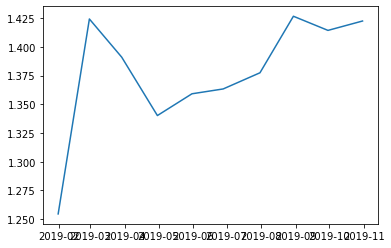

In [17]:
plt.plot(yield_array_9.cumprod())

# 8类

In [18]:
portfolio_8=pd.read_csv('xgboost/data/portfolio_8.csv')
portfolio_8=portfolio_8[['trade_dt_x','wind_code']]
portfolio_8['trade_dt_x']=pd.to_datetime((portfolio_8['trade_dt_x']).apply(str))
df_8= pd.merge(portfolio_8, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_8['s_mq_pctchange']/=100
df_8['s_mq_pctchange']+=1
yield_array_8=df_8.groupby('label_time').mean()['s_mq_pctchange']

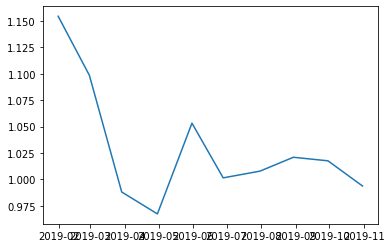

In [19]:
plt.plot(yield_array_8)

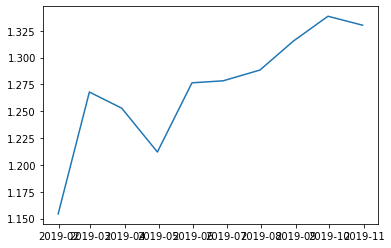

In [20]:
plt.plot(yield_array_8.cumprod())

In [21]:
np.std(yield_array_8)

0.05403046679507678

# 7类

In [24]:
portfolio_7=pd.read_csv('xgboost/data/portfolio_7.csv')
portfolio_7=portfolio_7[['trade_dt_x','wind_code']]
portfolio_7['trade_dt_x']=pd.to_datetime((portfolio_7['trade_dt_x']).apply(str))
df_7= pd.merge(portfolio_7, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_7['s_mq_pctchange']/=100
df_7['s_mq_pctchange']+=1
yield_array_7=df_7.groupby('label_time').mean()['s_mq_pctchange']

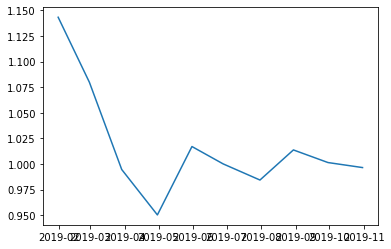

In [25]:
plt.plot(yield_array_7)

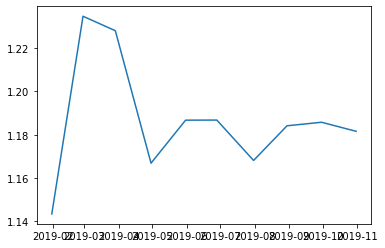

In [26]:
plt.plot(yield_array_7.cumprod())

In [27]:
np.std(yield_array_7)

0.05188315211789506

# 6类

In [31]:
portfolio_6=pd.read_csv('xgboost/data/portfolio_6.csv')
portfolio_6=portfolio_6[['trade_dt_x','wind_code']]
portfolio_6['trade_dt_x']=pd.to_datetime((portfolio_6['trade_dt_x']).apply(str))
df_6= pd.merge(portfolio_6, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_6['s_mq_pctchange']/=100
df_6['s_mq_pctchange']+=1
yield_array_6=df_6.groupby('label_time').mean()['s_mq_pctchange']

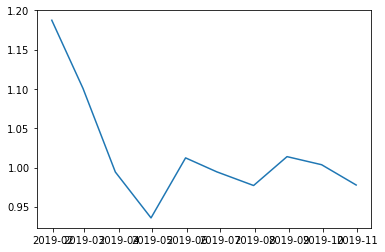

In [32]:
plt.plot(yield_array_6)

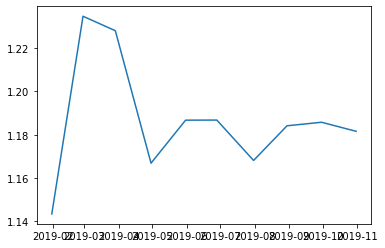

In [33]:
plt.plot(yield_array_7.cumprod())

In [34]:
np.std(yield_array_6)

0.06854595692402823

# 5类

In [35]:
portfolio_5=pd.read_csv('xgboost/data/portfolio_5.csv')
portfolio_5=portfolio_5[['trade_dt_x','wind_code']]
portfolio_5['trade_dt_x']=pd.to_datetime((portfolio_5['trade_dt_x']).apply(str))
df_5= pd.merge(portfolio_5, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_5['s_mq_pctchange']/=100
df_5['s_mq_pctchange']+=1
yield_array_5=df_5.groupby('label_time').mean()['s_mq_pctchange']

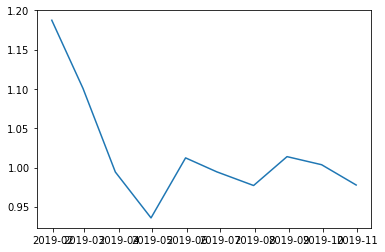

In [36]:
plt.plot(yield_array_6)

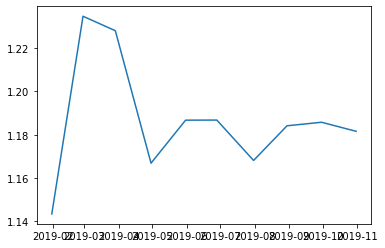

In [37]:
plt.plot(yield_array_7.cumprod())

In [38]:
np.std(yield_array_5)

0.07252245330611708

# 4类

In [39]:
portfolio_4=pd.read_csv('xgboost/data/portfolio_4.csv')
portfolio_4=portfolio_4[['trade_dt_x','wind_code']]
portfolio_4['trade_dt_x']=pd.to_datetime((portfolio_4['trade_dt_x']).apply(str))
df_4= pd.merge(portfolio_4, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_4['s_mq_pctchange']/=100
df_4['s_mq_pctchange']+=1
yield_array_4=df_4.groupby('label_time').mean()['s_mq_pctchange']

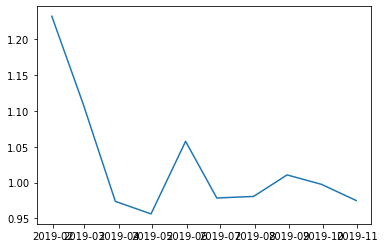

In [40]:
plt.plot(yield_array_4)

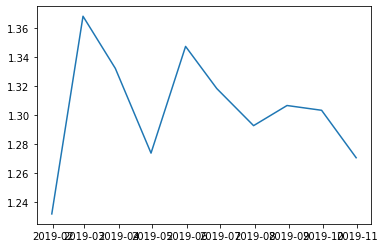

In [41]:
plt.plot(yield_array_4.cumprod())

# 3类

In [42]:
portfolio_3=pd.read_csv('xgboost/data/portfolio_3.csv')
portfolio_3=portfolio_3[['trade_dt_x','wind_code']]
portfolio_3['trade_dt_x']=pd.to_datetime((portfolio_3['trade_dt_x']).apply(str))
df_3= pd.merge(portfolio_3, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_3['s_mq_pctchange']/=100
df_3['s_mq_pctchange']+=1
yield_array_3=df_3.groupby('label_time').mean()['s_mq_pctchange']

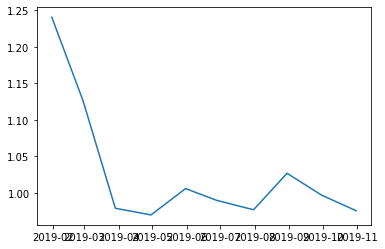

In [43]:
plt.plot(yield_array_3)

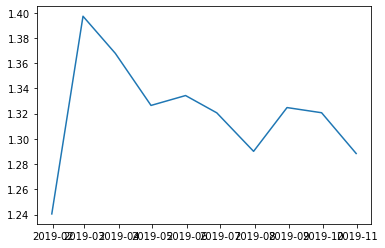

In [44]:
plt.plot(yield_array_3.cumprod())

# 2类

In [45]:
portfolio_2=pd.read_csv('xgboost/data/portfolio_2.csv')
portfolio_2=portfolio_2[['trade_dt_x','wind_code']]
portfolio_2['trade_dt_x']=pd.to_datetime((portfolio_2['trade_dt_x']).apply(str))
df_2= pd.merge(portfolio_2, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_2['s_mq_pctchange']/=100
df_2['s_mq_pctchange']+=1
yield_array_2=df_2.groupby('label_time').mean()['s_mq_pctchange']

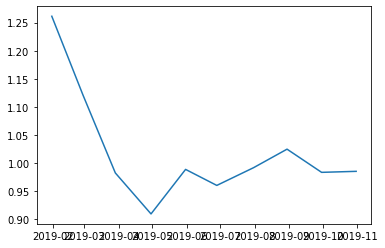

In [46]:
plt.plot(yield_array_2)

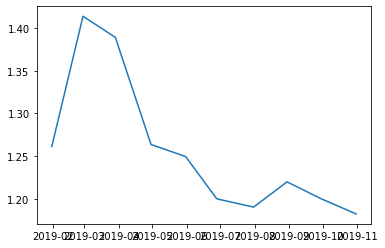

In [47]:
plt.plot(yield_array_2.cumprod())

# 1类

In [48]:
portfolio_1=pd.read_csv('xgboost/data/portfolio_1.csv')
portfolio_1=portfolio_1[['trade_dt_x','wind_code']]
portfolio_1['trade_dt_x']=pd.to_datetime((portfolio_1['trade_dt_x']).apply(str))
df_1= pd.merge(portfolio_1, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_1['s_mq_pctchange']/=100
df_1['s_mq_pctchange']+=1
yield_array_1=df_1.groupby('label_time').mean()['s_mq_pctchange']

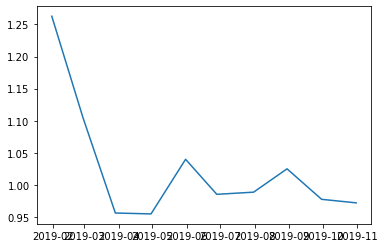

In [49]:
plt.plot(yield_array_1)

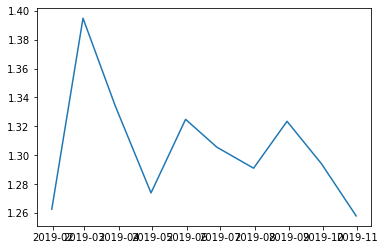

In [50]:
plt.plot(yield_array_1.cumprod())

# 0类

In [51]:
portfolio_0=pd.read_csv('xgboost/data/portfolio_0.csv')
portfolio_0=portfolio_0[['trade_dt_x','wind_code']]
portfolio_0['trade_dt_x']=pd.to_datetime((portfolio_0['trade_dt_x']).apply(str))
df_0= pd.merge(portfolio_0, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_0['s_mq_pctchange']/=100
df_0['s_mq_pctchange']+=1
yield_array_0=df_0.groupby('label_time').mean()['s_mq_pctchange']

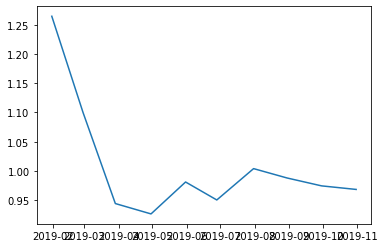

In [52]:
plt.plot(yield_array_0)

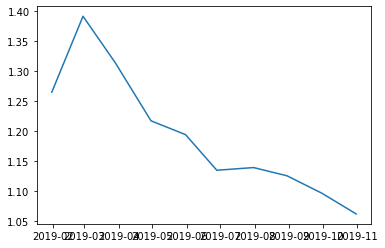

In [54]:
plt.plot(yield_array_0.cumprod())

In [55]:
np.std(yield_array_0)

0.09595440218108071